In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast 

# import os
# if os.name == 'posix' :
#     plt.rc('font', family='AppleGothic')
# else :
#     plt.rc('font', family='Malgun Gothic')
    
plt.rc('axes', unicode_minus=False)

plt.rcParams['font.family'] = 'NanumGothic' 
plt.rcParams['axes.unicode_minus'] = False
import koreanize_matplotlib

- 8일차 리텐션 코호트 최종 테이블

In [63]:
retention_8day_df = pd.read_csv('./votes/final_retentionchart_8day.csv')
retention_8day_df.head()

,user_id,total_votes,unique_days,first_vote,last_vote,active_days,cohort_day,retention_day8,ret_group,ret_group_over,ret_group_under,gender,group_id,school_id,grade
0,838023,22,5,2023-04-29,2023-05-04,5,2023-04-29,0.515152,50 이상,50 이상,NaN,F,233.0,271.0,1.0
1,838466,127,6,2023-05-02,2023-05-07,5,2023-05-02,0.569444,50 이상,50 이상,NaN,F,321.0,369.0,2.0
2,838642,10,2,2023-04-28,2023-04-29,1,2023-04-28,0.560000,50 이상,50 이상,NaN,F,356.0,271.0,2.0
3,839357,205,8,2023-04-29,2023-05-07,8,2023-04-29,0.515152,50 이상,50 이상,NaN,M,519.0,271.0,1.0
4,840293,170,7,2023-05-03,2023-05-15,12,2023-05-03,0.422977,50 미만,NaN,50 미만,F,838.0,369.0,1.0


In [64]:
# 유저 id 리스트로 만들기

# 타켓 모든 리스트
user_total_list = list(retention_8day_df['user_id'].unique())

# 50% 이상 코호트
user_upper_list = list(retention_8day_df[retention_8day_df['ret_group'] == '50 이상']['user_id'].unique())

# 50% 미만 코호트
user_lower_list = list(retention_8day_df[retention_8day_df['ret_group'] == '50 미만']['user_id'].unique())

In [65]:
# 표본 수 확인
print(f"전체 유저 수 : {len(user_total_list)}")
print(f"50% 이상 유저 수 : {len(user_upper_list)}")
print(f"50% 미만 유저 수 : {len(user_lower_list)}")

전체 유저 수 : 4703
50% 이상 유저 수 : 1841
50% 미만 유저 수 : 2862


- 누적 회원가입 수

In [66]:
user_df = pd.read_parquet('./votes/accounts_user.parquet')
user_df.head()

,id,is_superuser,is_staff,gender,point,friend_id_list,is_push_on,created_at,block_user_id_list,hide_user_id_list,ban_status,report_count,alarm_count,pending_chat,pending_votes,group_id
0,831956,1,1,None,600,"[1292473, 913158, 1488461, 1064695, 1043565, 1...",0,2023-03-29 03:44:14.047130,[],[],N,0,0,0,0,NaN
1,831962,0,0,F,2248,"[833025, 832642, 982531, 879496, 838541, 83752...",1,2023-03-29 05:18:56.162368,[],[],N,253,40878,5499,110,12.0
2,832151,0,0,M,1519,"[838785, 982531, 882567, 879496, 838541, 83649...",0,2023-03-29 12:56:34.989468,[],[],N,0,37,0,47,1.0
3,832340,0,0,F,57,"[841345, 982531, 838785, 963714, 882567, 83252...",1,2023-03-29 12:56:35.020790,[],[],N,0,19,0,21,1.0
4,832520,0,0,M,1039,"[874050, 849763, 874212, 844297, 838541, 84004...",0,2023-03-29 12:56:35.049311,[],[],N,0,29,0,15,12.0


In [67]:
# 연-월-일 컬럼 뽑기
user__df = user_df.copy()
user__df['year_month_day'] = user__df['created_at'].dt.strftime('%Y-%m-%d')
# 연-월 컬럼 뽑기
user__df['year_month'] = user__df['created_at'].dt.strftime('%Y-%m')
user__df.head()

,id,is_superuser,is_staff,gender,point,friend_id_list,is_push_on,created_at,block_user_id_list,hide_user_id_list,ban_status,report_count,alarm_count,pending_chat,pending_votes,group_id,year_month_day,year_month
0,831956,1,1,None,600,"[1292473, 913158, 1488461, 1064695, 1043565, 1...",0,2023-03-29 03:44:14.047130,[],[],N,0,0,0,0,NaN,2023-03-29,2023-03
1,831962,0,0,F,2248,"[833025, 832642, 982531, 879496, 838541, 83752...",1,2023-03-29 05:18:56.162368,[],[],N,253,40878,5499,110,12.0,2023-03-29,2023-03
2,832151,0,0,M,1519,"[838785, 982531, 882567, 879496, 838541, 83649...",0,2023-03-29 12:56:34.989468,[],[],N,0,37,0,47,1.0,2023-03-29,2023-03
3,832340,0,0,F,57,"[841345, 982531, 838785, 963714, 882567, 83252...",1,2023-03-29 12:56:35.020790,[],[],N,0,19,0,21,1.0,2023-03-29,2023-03
4,832520,0,0,M,1039,"[874050, 849763, 874212, 844297, 838541, 84004...",0,2023-03-29 12:56:35.049311,[],[],N,0,29,0,15,12.0,2023-03-29,2023-03


In [68]:
# 월별 회원가입 유저 수 구하기
user_count_df = user__df.groupby(['year_month'])['id'].nunique().reset_index(name='daily_user_cnt')
user_count_df.head()

,year_month,daily_user_cnt
0,2023-03,33
1,2023-04,19060
2,2023-05,635505
3,2023-06,16737
4,2023-07,1849


In [69]:
# 누적 회원 수 구하기
user_count_df['total_user'] = user_count_df['daily_user_cnt'].cumsum()
user_count_df.head()

,year_month,daily_user_cnt,total_user
0,2023-03,33,33
1,2023-04,19060,19093
2,2023-05,635505,654598
3,2023-06,16737,671335
4,2023-07,1849,673184


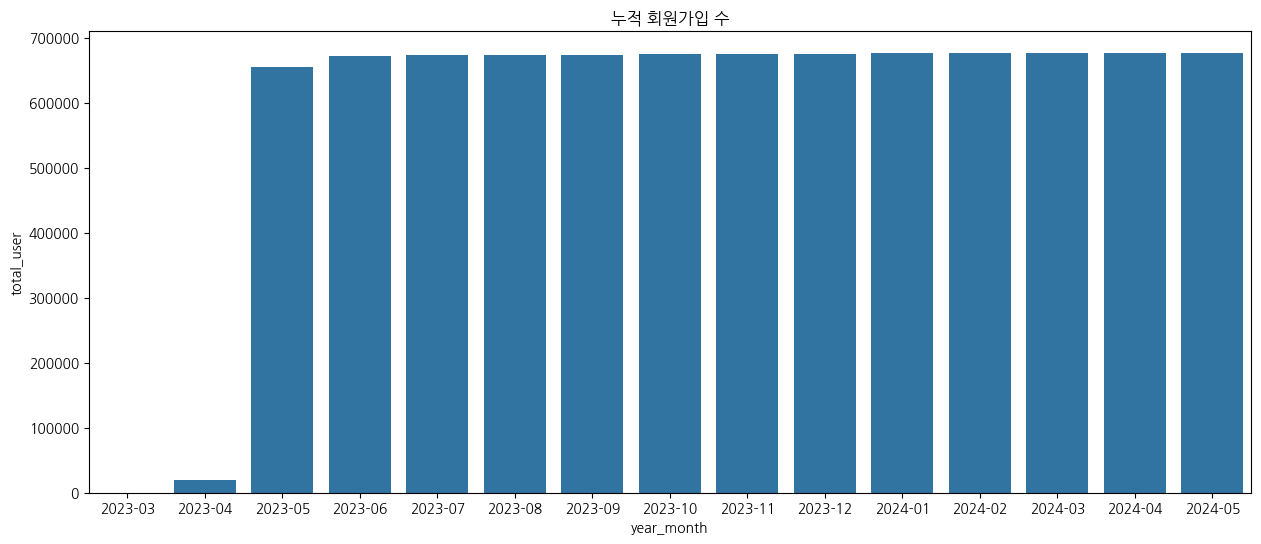

In [70]:
# 시각화 해보기
plt.figure(figsize=(15,6))
sns.barplot(data=user_count_df, x='year_month', y='total_user')
plt.title('누적 회원가입 수')
plt.show()

- 투표자 수 구하기

In [71]:
userquestion_df = pd.read_parquet('./votes/accounts_userquestionrecord.parquet')
userquestion_df.head()

,id,status,created_at,chosen_user_id,question_id,user_id,question_piece_id,has_read,answer_status,answer_updated_at,report_count,opened_times
0,771777,C,2023-04-28 12:27:49,849469,252,849436,998458,0,N,2023-04-28 12:27:49,0,0
1,771800,C,2023-04-28 12:28:02,849446,244,849436,998459,0,N,2023-04-28 12:28:02,0,0
2,771812,C,2023-04-28 12:28:09,849454,183,849436,998460,1,N,2023-04-28 12:28:09,0,0
3,771828,C,2023-04-28 12:28:16,847375,101,849436,998461,0,N,2023-04-28 12:28:16,0,0
4,771851,C,2023-04-28 12:28:26,849477,209,849436,998462,1,N,2023-04-28 12:28:26,0,0


In [72]:
userquestion__df = userquestion_df.copy()

# 연-월-일 컬럼 뽑기
userquestion__df['year_month_day'] = userquestion__df['created_at'].dt.strftime('%Y-%m-%d')
# # 연-월 컬럼 뽑기
userquestion__df['year_month'] = userquestion__df['created_at'].dt.strftime('%Y-%m')
userquestion__df.head()

,id,status,created_at,chosen_user_id,question_id,user_id,question_piece_id,has_read,answer_status,answer_updated_at,report_count,opened_times,year_month_day,year_month
0,771777,C,2023-04-28 12:27:49,849469,252,849436,998458,0,N,2023-04-28 12:27:49,0,0,2023-04-28,2023-04
1,771800,C,2023-04-28 12:28:02,849446,244,849436,998459,0,N,2023-04-28 12:28:02,0,0,2023-04-28,2023-04
2,771812,C,2023-04-28 12:28:09,849454,183,849436,998460,1,N,2023-04-28 12:28:09,0,0,2023-04-28,2023-04
3,771828,C,2023-04-28 12:28:16,847375,101,849436,998461,0,N,2023-04-28 12:28:16,0,0,2023-04-28,2023-04
4,771851,C,2023-04-28 12:28:26,849477,209,849436,998462,1,N,2023-04-28 12:28:26,0,0,2023-04-28,2023-04


In [73]:
# 월별 투표 유저 수 구하기
vote_count_df = userquestion__df.groupby(['year_month'])['user_id'].nunique().reset_index(name='daily_vote_cnt')
vote_count_df.head()

,year_month,daily_vote_cnt
0,2023-04,338
1,2023-05,4797
2,2023-06,1872
3,2023-07,389
4,2023-08,170


In [74]:
user_count_df.head()

,year_month,daily_user_cnt,total_user
0,2023-03,33,33
1,2023-04,19060,19093
2,2023-05,635505,654598
3,2023-06,16737,671335
4,2023-07,1849,673184


In [75]:
# 월별 투표수, 누적 회원수 산출
vote_rate_df = pd.merge(user_count_df, vote_count_df, on='year_month', how='left')
vote_rate_df.head()

,year_month,daily_user_cnt,total_user,daily_vote_cnt
0,2023-03,33,33,NaN
1,2023-04,19060,19093,338.0
2,2023-05,635505,654598,4797.0
3,2023-06,16737,671335,1872.0
4,2023-07,1849,673184,389.0


In [76]:
# 투표율 구하기
vote_rate_df['vote_rate'] = vote_rate_df['daily_vote_cnt'] / vote_rate_df['total_user']
vote_rate_df.head()

,year_month,daily_user_cnt,total_user,daily_vote_cnt,vote_rate
0,2023-03,33,33,NaN,NaN
1,2023-04,19060,19093,338.0,0.017703
2,2023-05,635505,654598,4797.0,0.007328
3,2023-06,16737,671335,1872.0,0.002788
4,2023-07,1849,673184,389.0,0.000578


In [77]:
# 3월 제외
vote_rate_df = vote_rate_df.dropna()

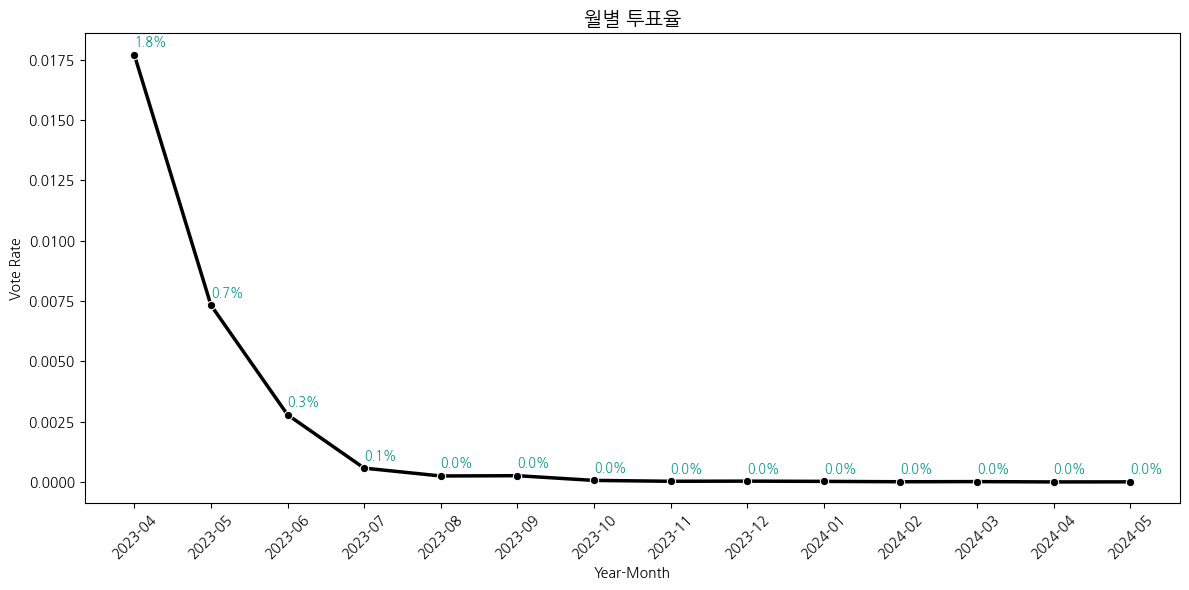

In [78]:
# 시각화
plt.figure(figsize=(12, 6))

# 라인 그래프: 색상, 굵기 설정
sns.lineplot(
    data=vote_rate_df,
    x='year_month',
    y='vote_rate',
    color='black',    # 라인 색상
    linewidth=2.5,        # 라인 굵기
    marker='o',           # 포인트 마커 추가
    markersize=6
)

# 각 포인트에 값 표시
for i, row in vote_rate_df.iterrows():
    plt.text(
        row['year_month'], row['vote_rate'] + 0.0005,   # y값 위에 표시
        f"{row['vote_rate']:.1%}",                     # 퍼센트 형식 (예: 23.1%)
        ha='left', va='center', fontsize=9, color='#009688'
    )

plt.title('월별 투표율', fontsize=14)
plt.xlabel('Year-Month')
plt.ylabel('Vote Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- 4~7월로 기간 잡음
- 해당 기간에서 가입자 대비 투표한 인원 찾기
- 해당 기간에서의 가입자들의 학교 수와 투표한 사람의 학교 수 비교

In [82]:
# 해당 기간의 투표자 수

# 투표 기록 테이블
userquestion_df = pd.read_parquet('./votes/accounts_userquestionrecord.parquet')
# 기간 자르기
userquestion_4567_df = userquestion_df[(userquestion_df['created_at']>='2023-04-01')&(userquestion_df['created_at']<'2023-08-01')]
# 투표한 유저 수 
userquestion_4567_df['user_id'].nunique()

4845